In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import imshow
from joblib import dump, load
import copy
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from tensorflow.keras.datasets import mnist
from sklearn.metrics import mean_squared_error

# <font color='blue'> Classification EMNIST dataset </font>

In [2]:
# Load the training dataset
tr=pd.read_csv("D:\\Bachelor\\Machine-Learning\\datasets\\emnist-digits-train.csv",header=None)
tr

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Load the test dataset
te=pd.read_csv("D:\\Bachelor\\Machine-Learning\\datasets\\emnist-digits-test.csv",header=None)
te

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train=tr.drop(tr.columns[[0]],axis=1)
x_test=te.drop(te.columns[[0]],axis=1)
print(x_train)
print(x_test)

        1    2    3    4    5    6    7    8    9    10   ...  775  776  777  \
0         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
239995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

        778  779  780  781  782  783  7

In [5]:
x_train.shape

(240000, 784)

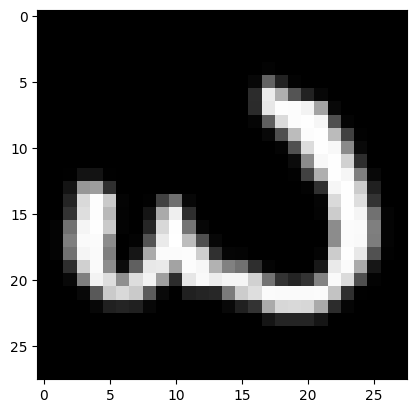

In [6]:
d=x_train.iloc[5000,:]
d=np.array(d)
xtr=d.reshape(28,28)
plt.imshow(xtr,cmap='gray')

In [7]:
xtr.shape

(28, 28)

In [8]:
y_train=tr.iloc[:,0]
print(y_train)
y_test=te.iloc[:,0]
print(y_test)

0         8
1         9
2         6
3         3
4         6
         ..
239995    4
239996    2
239997    1
239998    1
239999    0
Name: 0, Length: 240000, dtype: int64
0        0
1        9
2        7
3        9
4        2
        ..
39995    9
39996    7
39997    3
39998    7
39999    4
Name: 0, Length: 40000, dtype: int64


In [9]:
x_train.shape

(240000, 784)

In [10]:
#x_test.shape

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
#X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2,random_state = 0)

In [13]:
#X_train.shape
x_train.shape

(240000, 784)

In [14]:
y_train.shape

(240000,)

In [15]:
y_test.shape

(40000,)

In [16]:
# Create the model and train it
# n_estimators=200 is the number of trees in the forest
# max_depht = 11 is his determines the maximum depth of the tree. 
# The default value is set to none. This will often result in over-fitted decision trees.
# random_state controls the randomness of the bootstrapping of the samples used when building trees 
# and the sampling of the features to consider when looking for the best split at each node. 
digits1 = RandomForestClassifier(n_estimators=200,max_depth=11, random_state=0)
digits1.fit(x_train, y_train)
y_pred=digits1.predict(x_test)
#y_pred=digits1.predict(X_test)
print(y_pred)

[0 9 7 ... 3 7 4]


In [17]:
dump(digits1, 'RF_M.joblib')

['RF_M.joblib']

In [18]:
RF_Model=load('RF_M.joblib')
#y_pred1=RF_Model.predict(X_test)
y_pred1=RF_Model.predict(x_test)
y_pred1

array([0, 9, 7, ..., 3, 7, 4], dtype=int64)

In [19]:
# y_test

In [20]:
y_pred

array([0, 9, 7, ..., 3, 7, 4], dtype=int64)

In [21]:
# Evaluate the model
acc=accuracy_score(y_test,y_pred)
acc

0.96475

In [22]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:',mse)

Mean squared error: 0.58465


In [23]:
y_test1=y_test
x_test1=x_test
x_test1=x_test1*255
x_test1=np.array(x_test1)
x_test1 = x_test1.reshape(x_test1.shape[0], 28, 28,1)
x_test1.shape

(40000, 28, 28, 1)

0


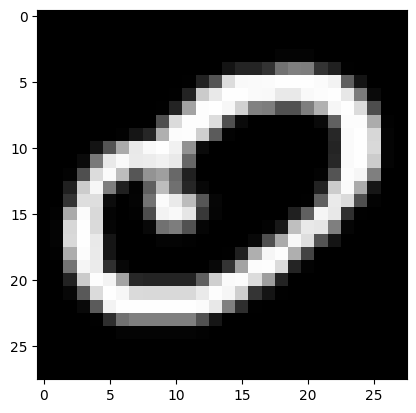

In [24]:
plt.imshow(x_test1[0],cmap='gray')
print(y_test1[0])

(1, 784)
[6]


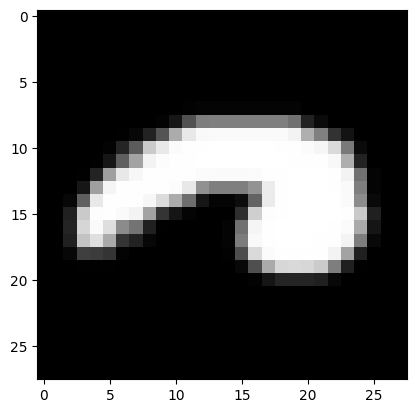

In [25]:
inx=800
img2=x_test1[inx]
img2=np.array(img2).reshape(-1,784)
print(img2.shape)
img2=img2/255.0
#img2.shape
y_pred_test=digits1.predict(img2)
print(y_pred_test)
plt.imshow(x_test1[inx],cmap='gray')